# Introduction to Data Science & Linear Algebra in Python

This lab will introduce you to some of the commonly used data science Python packages focusing on Pandas and Numpy. Also, as much of the foundation of data science is rooted in linear algebra, we will review matrix operations using Numpy. This is important as having a working understanding of matrices will be essential in this course as many of the algorithms we learn utilize and rely upon matrix operations.

In [103]:
# %pip install numpy
from scipy.linalg import svd
import numpy as np
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
from numpy.linalg import eig
# %pip install pandas
import pandas as pd
# %pip install scikit-learn==0.23
from sklearn.datasets import load_iris  # used to obtain the pre-loaded data
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# %pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
# %pip install scipy

### Pandas

Pandas is a powerful data analysis and manipulation tool. When working with Pandas, we will typically be working with what is called a 'DataFrame,' which we can think of as a two-dimensional structure for storing tabular data. 

To showcase some of its functionality, we will load a dataset using another package, scikit-learn, which we will cover in detail in the next lab. 

In [104]:
iris_data = load_iris()  # load the data
print(iris_data.keys()) # what does our data object contain?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [105]:
# can use 'DESCR' to get more details about our data
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [106]:
# transform data into a pandas DataFrame using the 'data' and 'feature_names' keys
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()  # preview the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
# how many rows/columns does our data have? in other words, what is its shape?

iris_df.shape  # number of rows, number of columns

(150, 4)

Next we will add the target variable, the species, to our DataFrame. To do so, we will make it into a **series** object, which is a one-dimensional array that can hold data of any type and is composed of indexes and values.

In [108]:
# get species from key (target)
pd.Series(iris_data.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [109]:
# add our target variable, the species to our DataFrame as a series object
iris_df['species'] = pd.Series(iris_data.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


But what if we want our target variable to be the actual species name? We can use the replace method!

In [110]:
# replacing target variable
iris_df['species'] = iris_df['species'].replace(
    to_replace=[0, 1, 2], value=iris_data.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


There may be scenarios where we wish to filter to a subset of the data that meets certain conditions. This can be easily done using our pandas DataFrame. For example, what if we only want the rows where the species is 'setosa'?

In [111]:
# filtering data
setosa_data = iris_df[(iris_df['species'] == 'setosa')]
setosa_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can also specify multiple conditions to filter on as such:

In [112]:
# use & when we want both conditions to be met
setosa_data_long_sepals = iris_df[(iris_df.species == 'setosa') & (
    iris_df['sepal length (cm)'] > 5.0)]
setosa_data_long_sepals.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
27,5.2,3.5,1.5,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
18,5.7,3.8,1.7,0.3,setosa
16,5.4,3.9,1.3,0.4,setosa
44,5.1,3.8,1.9,0.4,setosa


In [113]:
# YOUR CODE: in the code above, replace '&' with '|' - can you tell the difference?
setosa_data_long_sepals = iris_df[(iris_df.species == 'setosa') | (
    iris_df['sepal length (cm)'] > 5.0)]  # | is 并集，!= is ~ is "not"
setosa_data_long_sepals.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
99,5.7,2.8,4.1,1.3,versicolor
149,5.9,3.0,5.1,1.8,virginica
33,5.5,4.2,1.4,0.2,setosa
125,7.2,3.2,6.0,1.8,virginica
45,4.8,3.0,1.4,0.3,setosa


We may also wish to sort our data by one of the columns. This can be done using the sort_values method on our dataframe to which we will specify the column on which we want to sort and whether we want to sort the values from low to high or high to low.

In [114]:
# sorting data, default is to sort values from low to high
iris_df.sort_values('petal width (cm)').head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
32,5.2,4.1,1.5,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
37,4.9,3.6,1.4,0.1,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


In [115]:
# YOUR CODE: add the argument 'ascending=False' to sort_values - what is the effect?
iris_df.sort_values('petal width (cm)', ascending=False).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica
114,5.8,2.8,5.1,2.4,virginica
140,6.7,3.1,5.6,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
148,6.2,3.4,5.4,2.3,virginica
115,6.4,3.2,5.3,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica


When exploring our data, we usually want to get an understanding of the distribution of the values of our data. This can be done by applying the describe method to our data.

In [116]:
# use 'describe' to get a better understanding of our features
iris_df.describe(include="all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Next, we can use the nunique and unique methods to understand how many unique values exist in the column and what they are - this is especially useful for categorical data such as our 'species' column.

In [117]:
# how many different species? what are they?
print("Number of unique species:", iris_df.species.nunique())
print("Species:", iris_df.species.unique())

Number of unique species: 3
Species: ['setosa' 'versicolor' 'virginica']


We can also use the value_counts method to compute how many samples of each species we have in our data.

In [118]:
# how many of each species is in our data?
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

What if we want to compute the mean/median/max/etc. of a column for each category/group? We can use the groupby method as such:

In [119]:
# example; average petal length for each species
iris_df.groupby('species')['petal length (cm)'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

In [120]:
# YOUR CODE: what is the maximum sepal width for each species?

iris_df.groupby('species')['sepal width (cm)'].max()

species
setosa        4.4
versicolor    3.4
virginica     3.8
Name: sepal width (cm), dtype: float64

Another useful method is get_dummies which will create a dummy variable for each unique value/category of a column with a value of 0 or 1 to denote whether or not the instance belongs to that category. We can also use the drop_first argument if we want to create k-1 dummy variables where k is the number of unique categories - this is important when we need our columns to be linearly independent. We can apply this function to our species column as such:

In [125]:
dummy_data = pd.get_dummies(iris_df, columns=["species"])
dummy_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [122]:
# YOUR CODE: add the argument 'drop_first = True' to the code above - does it behave as expected?

dummy_data = pd.get_dummies(iris_df, columns=["species"], drop_first=True)
dummy_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [123]:
# WHY TROP 1 COLUMN?
# it is actually a problem with one-hot encoding - after knowing the value for the k-1 columns, you can infer the value for column k. So if you keep all k columns as features, they will be linearly dependent, and when doing linear regression the parameter values for these columns would be unidentifiable.

We may then choose to join these new columns to our original data. This can be done using the merge method. In the example below, we are joining the DataFrames on their indexes and are using an inner join meaning that we will only keep instances that match/exist in both dataframes.

In [126]:
merged_data = iris_df.merge(dummy_data[['species_setosa', 'species_versicolor', 'species_virginica']],
                            how="inner", left_index=True, right_index=True)

merged_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [127]:
# always a good check to make sure we have the number of rows/columns we expected

# still have 150 rows, added 2/3 columns depending on which dummy variables were used
merged_data.shape

(150, 8)

### Numpy

Another popular Python library is Numpy. Numpy is great for working with arrays as it makes it easy and fast to apply functions to data that is formatted as an array. We can think of an array as a collection of elements that have associated indexes or positions, similar to a list. However, unlike in a list, array elements must all be of the same data type. We will use Numpy below to review matrices and matrix operations.

### 1. Matrices

A **matrix** is an array of numbers that are organized into a fixed number of rows and columns. We will start with the basics of matrices:
- shape
- transpose
- mathematical operations (sum, mean, max, etc.)
- matrix addition
- element-wise multiplication
- matrix multiplication
- inverse
- broadcasting

In [128]:
# define a matrix
A = np.array([[1, 2, 3], [4, 5, 6]])  # use numpy to define our matrix
print(A)

[[1 2 3]
 [4 5 6]]


#### 1.1 Shape

The shape of the matrix refers to how many rows and columns the matrix is composed of.

In [129]:
print("Shape of A:", A.shape)  # 2 rows, 3 columns

Shape of A: (2, 3)


#### 1.2 Transpose

Transposing a matrix can be thought of as flipping the matrix about the diagonal.

In [130]:
print(A.T)

[[1 4]
 [2 5]
 [3 6]]


In [131]:
print(A.T.shape)  # see that we now have 3 rows, 2 columns

(3, 2)


#### 1.3 Mathematical Operations

When applying mathematical operations to our matrix, we can apply it to the entire matrix (the default) or specify the 'axis' - 0 will compute the operation for each column and 1 will compute the operation for each row.

In [132]:
# sum
print(A.sum())  # sums all entries of the matrix

21


In [133]:
# mean
print(A.mean(axis=0))  # computes mean for each column ## colum: axis=0 ## row: axis=1

[2.5 3.5 4.5]


In [134]:
# YOUR CODE: compute the maximum value for each row of matrix A

print(A.max(axis=1))

[3 6]


In [135]:
%%timeit  ## see how much time to run
A.max(axis=1)

1.84 µs ± 45 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### 1.4 Matrix Addition

When adding matrices, it adds each element by its position. Therefore, the matrices must be the same shape!

In [136]:
B = np.array([[1, 3, 5], [2, 4, 6]])
print(A, "\n")
print(B)
A + B

[[1 2 3]
 [4 5 6]] 

[[1 3 5]
 [2 4 6]]


array([[ 2,  5,  8],
       [ 6,  9, 12]])

#### 1.5 Matix Element-Wise Multiplication

Similar to adding matrices, we can multiple the elements of a matrix by multiplying each element that occupies the same position. Again, this means that the matrices must be of the same shape!

In [137]:
A*B ## 位置相乘

array([[ 1,  6, 15],
       [ 8, 20, 36]])

#### 1.6 Matrix Multiplication

You can use `@` to represent matrix multiplication. However, the size of the two arrays must be compatible to do this operation. For example, if A has shape (M, P) and matrix B has shape (P, N), they are considered compatible since the inner dimensions match (P=P). The result of `A @ B` will have shape (M, N) - the outer dimensions of the matrices.

In [138]:
A @ B

# think: why does this cause an error? consider their shapes...

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [139]:
print(A.shape, B.shape)  # inner dimensions do not match, 3 != 2

(2, 3) (2, 3)


In [140]:
print(A.shape, B.T.shape)  # inner dimensions now match, 3 = 3

(2, 3) (3, 2)


In [141]:
A @ B.T

array([[22, 28],
       [49, 64]])

#### 1.7 Inverse

When working with numbers, an inverse is simply the reciprocal of the number. We can think of the inverse of a matrix in a similar fashion as it follows along a similar principal that $A × A^{-1} = A^{-1} × A = I$ where A is a matrix and I is the identity matrix. Therefore, we can think of the identity matrix as the matrix equivalent of "1" from when we multiple a number its by reciprocal. The resulting identity matrix will always be a square (i.e.., number of rows = number of columns) with values of 1 along the diagonal and 0 elsewhere. For more information on how the inverse is computed: https://www.mathsisfun.com/algebra/matrix-inverse.html

In [142]:
# example of I, the identity matrix

I = np.array([[1, 0], [0, 1]])
print(I)

[[1 0]
 [0 1]]


In [143]:
X = A @ B.T  # matrix multiplication
print(X, "\n")

# inverse it
X_inverse = np.linalg.inv(X)
print(X_inverse)

[[22 28]
 [49 64]] 

[[ 1.77777778 -0.77777778]
 [-1.36111111  0.61111111]]


In [144]:
## 为什么这里结果看起来好像 不一样？有一个是3.55271368e-15？

# checks （3.55 * 10^(-15), which is still a number that is very close to 0， It is because of the unreliability of float storage and calculation， ）
# when you want to compare the different float numbers, you might not want to use "==" directly, but normally people would do 
# something like "abs(a - b) < 1e-5", to indicate that if the difference between two float numbers are less than 10^(-5), we consider them the same number.

print(X @ X_inverse, "\n")

print(X_inverse @ X)

[[1.00000000e+00 3.55271368e-15]
 [0.00000000e+00 1.00000000e+00]] 

[[1. 0.]
 [0. 1.]]


#### 1.8 Broadcasting

If arrays have different shapes but some dimensions are compatible, the operation will be broadcast to other dimensions. This allows us to still apply some arithmetic operations between arrays of different shapes. 

In [145]:
# integers can be easily broadcast to the whole array
print(A)
print(A + 2)  # adds two to each position

[[1 2 3]
 [4 5 6]]
[[3 4 5]
 [6 7 8]]


In [146]:
# YOUR CODE: multiple each element of matrix A by 2
print(A * 2)

[[ 2  4  6]
 [ 8 10 12]]


In [147]:
# broadcasting A to a matrix C of higher dimensions, like 3-d matrix
C = np.array([[[1, 1, 1], [1, 1, 1]], [[2, 2, 2], [2, 2, 2]]]) ## 2个2*3的matrix， 3-D
print("this is C:")
print(C)
print("this is A:")
print(A)
print("this is SHAPE:")
print(C.shape, A.shape)  # second two dimensions are the same

this is C:
[[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]]
this is A:
[[1 2 3]
 [4 5 6]]
this is SHAPE:
(2, 2, 3) (2, 3)


In [148]:
print("A:\n", A, "\n")
print("C:\n", C, "\n")
print("A+C:\n", A + C)  # adds A to both dimensions of C

A:
 [[1 2 3]
 [4 5 6]] 

C:
 [[[1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]]] 

A+C:
 [[[2 3 4]
  [5 6 7]]

 [[3 4 5]
  [6 7 8]]]


### 2. Eigenvalues

It is often useful to express things in simpler, smaller parts as properties of these simpler and smaller parts often speak volumes about the characteristics or behavior of the whole. They can also allow us to calculate things faster.

This is where eigenvalues come in. **Eigenvalues** are values (positive and/or negative) that produce an original matrix when multiplied by a special vector, the **eigenvector**.

Therefore, for a matrix A, eigenvector v and eigenvalues λ,
    $Av = λv$, where:
    - A is an n x n matrix, a “square” matrix **remember this requirement!**
    - λ is a vector of length n 
    - V is also a vector of length n 

This allows us to represent big matrices with just two vectors! Let's see an example.

In [149]:
# this will fail, let's ask why?
print("The shape of A is ", A.shape)
try:
    eig(A)  # try to perform eigendecomposition
except np.linalg.LinAlgError:
    print("There was an error trying to do eigendecomposition on A!")
    
assert A.shape[0] == A.shape[1], "This matrix is not square!"

The shape of A is  (2, 3)
There was an error trying to do eigendecomposition on A!


AssertionError: This matrix is not square!

#### Why do matrices have to be square?
$Av = \lambda v$, the definition of the eigendecomposition problem only admits square shaped solutions.

Imagine, we know A is of size $m \times n$, then let's explore our definition:

* [$m \times n$] @ [$n \times n$] = [$?$] * $n \times n$

* From the left side, we have matrix $A$ and eigenvectors $v$
* Eigenvectors describe the column space of $A$, so we have $n$ of them
* From the right side we have **scalar multiplication**, not a matrix product... （eigenvalue is a number, a scalar） 
* So what number must [$?$] be? From the basics we know we can only multiply $n$ scalars by $n$ rows, to produce a $n \times n$ matrix
* Ans: [?] must be of size $n$
* And if this is true, then the left side, $m$ must actually be $m = n$ for it also to hold true

caveat: Here I'm trying to intuitively convince you that the matrices have to be square, have not rigorously checked this argument

In [150]:
# why spuare?
# 𝐴宽度是n，so两个𝑣需要是一样的并且能乘所以长度也是n，𝜆只是数字so不影响𝑣的长宽，要使两边成立，so 𝐴的长度也得是n行

In [151]:
a_square_matrix = np.array([[5, 1], [3, 3]])
the_eigenvalues, the_eigenvectors = eig(a_square_matrix) # eig( 来求eig
print("our square matrix: \n", a_square_matrix)
print("our eigenvalues: \n", the_eigenvalues)   # 这里print出来其实是多个eigenvalues， 每个都可以是特征值langda
print("our eigenvectors: \n", the_eigenvectors)  # matrix of eigenvectors

print("---- Let's check that one eigenvalue works as expected ----")

Av = a_square_matrix@the_eigenvectors  # matrix multiplcation
lambda_v = the_eigenvalues*the_eigenvectors  # element-wise multiplication
print('A@v\n', Av)
print("lambda * v\n", lambda_v)

our square matrix: 
 [[5 1]
 [3 3]]
our eigenvalues: 
 [6. 2.]
our eigenvectors: 
 [[ 0.70710678 -0.31622777]
 [ 0.70710678  0.9486833 ]]
---- Let's check that one eigenvalue works as expected ----
A@v
 [[ 4.24264069 -0.63245553]
 [ 4.24264069  1.8973666 ]]
lambda * v
 [[ 4.24264069 -0.63245553]
 [ 4.24264069  1.8973666 ]]


### 3. Singular Value Decomposition (SVD)

One of the major drawbacks of eigendecomposition is the requirement that the matrix must be square as we will frequently encounter situations where this is not the case. However, other matrix decomposition methods, such as **Singular Value Decomposition (SVD)** can be used in its place. SVD is similar to eigendecomposition in that an original matrix can be created from a function involving matrix products of eigenvectors and eigenvalues.  However, unlike eigendecomposition, it can work with non-square matrices and it is a partially constructed from matrix multiplication, left and right transpose and their eigenvectors. It is also different from eigendecomposition in that it is partially constructed from square roots of the eigenvalues, referred to as **singular values** rather than eigenvalues. We will refer to these singular values using 𝛔.

So, for SVD we have 3 matrices of singular values: 
    - U - the left singular vectors
    - V - the right singular vectors
    - and the (s) singular values common to both U and V, in a diagonal matrix 𝚺

In [153]:
# source: https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

U, s, VT = svd(a_square_matrix)  # apply svd() and get 2 resulting matrices， and (s) singular values

# s contains singular values but we need to insert them into a proper matrix with the values along the diagonal
# initalize matrix of all zeros
Sigma = np.zeros((a_square_matrix.shape[0], a_square_matrix.shape[1]))
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)  # add values

print("U\n", U)
print("Sigma\n", Sigma)
print("V transpose\n", VT)

print("---- Let's see if A = U Sigma V' ----\n")

print(
    "U Sigma V'\n",
    U.dot(Sigma.dot(VT))  # 二维情况下，.dot ==  @可以互换； 高维的情况下，@其实本身是numpy.matmul；
    # 满足交换律 也可以是 U.dot(Sigma).dot(VT)， or (a*b)*c = a*(b*c) [(a@b)@c = a@(b@c)]

)

print(
    "Original Matrix\n",
    a_square_matrix
)

U
 [[-0.78004181 -0.62572739]
 [-0.62572739  0.78004181]]
Sigma
 [[6.3591736  0.        ]
 [0.         1.88703765]]
V transpose
 [[-0.9085129  -0.41785681]
 [-0.41785681  0.9085129 ]]
---- Let's see if A = U Sigma V' ----

U Sigma V'
 [[5. 1.]
 [3. 3.]]
Original Matrix
 [[5 1]
 [3 3]]


In [155]:
# 特征值（需要square） 和 SVD （不需要square）都是为了用更简单的向量来 解释原矩阵，让事情变得更简单

### 4. Principal Component Analysis (PCA)

As review, variance is a measure of the spread or dispersion of data and is an important characteristic of data. With this in mind, PCA can be seen as a dimensionality reduction technique from N columns to k columns that preserves *most* of the variance among N columns. Comparing PCA and SVD, they are similar in that they both work on non-square and square matrices and make use of eigenvalues. However, PCA is different from SVD in that it does not work on the original matrix. Instead, it works on the covariance matrix.

One important thing to keep in mind with PCA is that variables with more variability will get more "power." Therefore, it is important that we scale our variables beforehand which can be done by simply setting whiten=True.

Lastly, one thing you may be wondering is how to choose the optimal number of principal components, k. Some approaches include:
 - Chose manually: If you theoretically expect an underlying dimension of the dataset, like there were 3 factors that created a process, then this could be a choice
 - Scree plot: This can be somewhat subjective but it is simple, can pick a cumulative variance cutoff point
 - Cross-validate: If used in a predictive task, treat as a tuning/hyperparameter

In [156]:
# PCA 降维尽可能多的保留解释原始方差，也可以不是square

(150, 2)
explained variance ratio (first two components): [0.92461872 0.05306648]


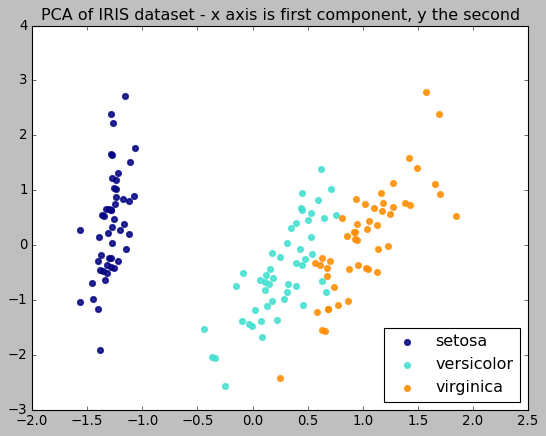

In [157]:
# Shamelessly taken from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# special note about this dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

iris = load_iris()  # reload the data
X = iris.data  # features
y = iris.target  # target/outcome variable 种类
target_names = iris.target_names

pca = PCA(n_components=2, whiten=True)  # apply PCA where k=2，降成2维
X_r = pca.fit(X).transform(X)
print(X_r.shape) #150个数据点 (150, 2)

# percentage of variance explained
print('explained variance ratio (first two components): %s'  # %s str()字符串用法
      % str(pca.explained_variance_ratio_))

# plot the results of our PCA
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names): # i是loop三种花
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)  ## y == i，其实是boolean to match 3种不同花 筛选出那一种的数据点， 然后 0，1分别是pca后两个compo的x,y数据值，坐标值； so一共分别画了三次画出来三种花的pca结果
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset - x axis is first component, y the second')
plt.show()  # see pretty good separation between the 3 species

Looking at the results, we see that most of the variance is explained by the first principal component - this makes sense as our data is very limited in this example. However, with more complex datasets, having additional principal components will be important for capturing the additional variance in the data.

In the next lab, we will build off of this introduction and will dive into applying machine learning techniques using scikit-learn.